In [1]:
from moseq2_detectron_extract.io.annot import default_keypoint_names, register_datasets, read_annotations, show_dataset_info,augment_annotations_with_rotation
from moseq2_detectron_extract.viz import visualize_annotations
from moseq2_detectron_extract.model.config import get_base_config, add_dataset_cfg
import cv2
from detectron2.data import MetadataCatalog
from moseq2_detectron_extract.model.model import Trainer, MoseqDatesetMapper, Predictor
import os
import datetime
import matplotlib.pyplot as plt
import random
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data.detection_utils import convert_image_to_rgb
import pycocotools

In [2]:
annot_file = "E:\\moseq_raw_data\\unet_testing\\mask_keypoints_for_michael\\result.json"

In [3]:
cfg = get_base_config()

In [4]:
annotations = read_annotations(annot_file, default_keypoint_names, mask_format=cfg.INPUT.MASK_FORMAT)
print("Num Raw Items: {}".format(len(annotations)))
annotations = augment_annotations_with_rotation(annotations)
show_dataset_info(annotations)
register_datasets(annotations, default_keypoint_names)

Num Raw Items: 472
Num Items:  1888
Image size range:  ((244, 250), (240, 250))
Width: 14.88/50.50/92.82
Height: 14.88/54.78/92.33
None


In [5]:
cfg = add_dataset_cfg(cfg)
cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.5, 1.0, 2.0, 3.0, 4.0]]
#cfg.MODEL.WEIGHTS = None
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('moseq_test',)
  TRAIN: ('moseq_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: L
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 250
  MAX_SIZE_TRAIN: 250
  MIN_SIZE_TEST: 240
  MIN_SIZE_TRAIN: (240,)
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: none
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0, 3.0, 4.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
    IN_FEATURES: ['res2', 'res3', 'res4', 'res5']
    NOR

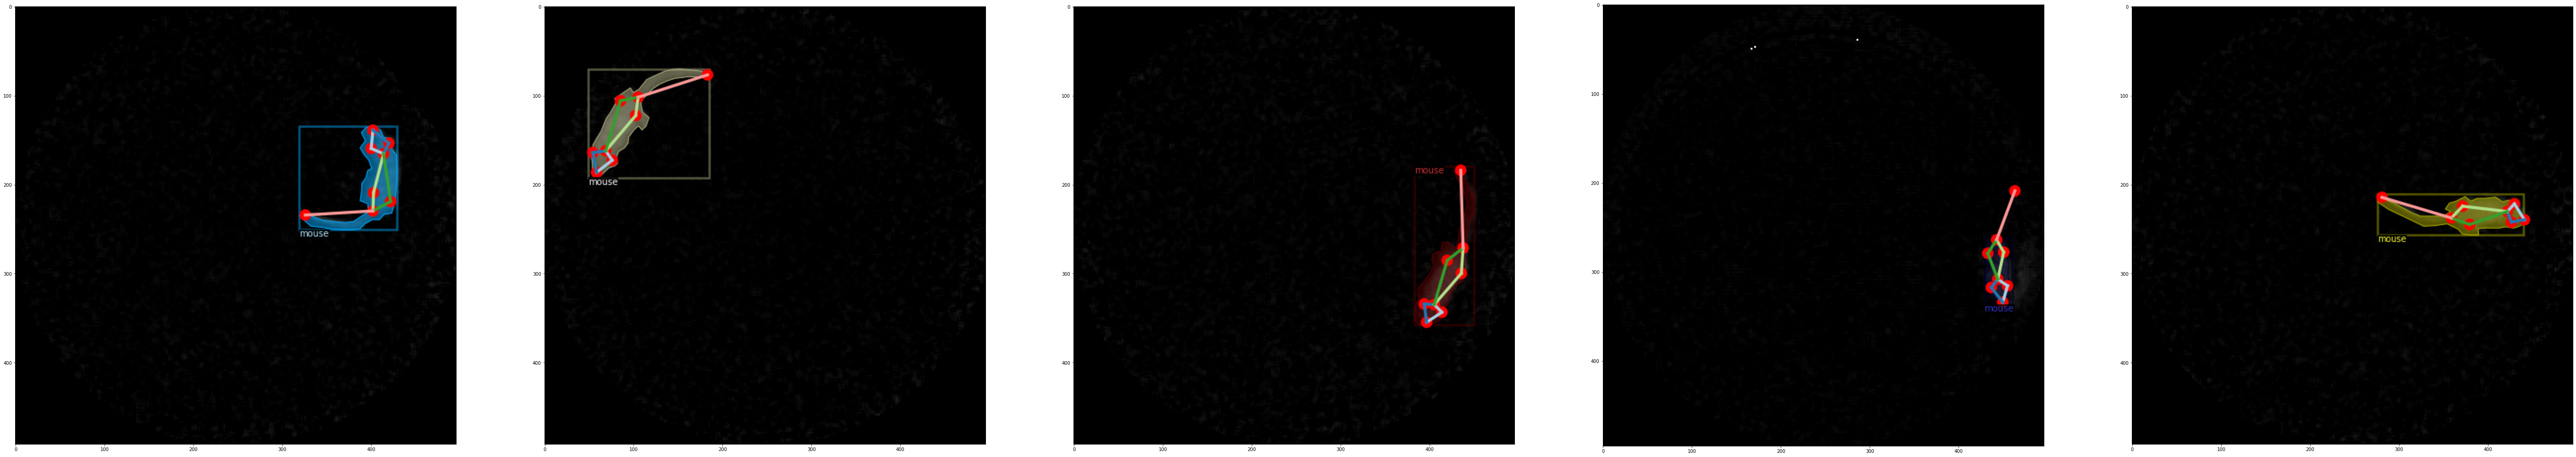

In [6]:
_, _ = visualize_annotations(annotations, MetadataCatalog.get("moseq_train"), num=5)

In [7]:
cfg.OUTPUT_DIR = os.path.join(cfg.OUTPUT_DIR, datetime.datetime.now().strftime("%Y-%m-%dT%H-%M_%S"))
print("Model output: {}".format(cfg.OUTPUT_DIR))
os.makedirs(cfg.OUTPUT_DIR, exist_ok=False)
with open(os.path.join(cfg.OUTPUT_DIR, "config.yaml"), 'w') as f:
    f.write(cfg.dump())

Model output: ./models/output_4\2021-06-29T19-36_42


In [8]:
#cfg.OUTPUT_DIR = 
trainer = Trainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[06/29 19:36:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'backbone.bottom_up.stem.conv1.weight' to the model due to incompatible shapes: (64, 3, 7, 7) in the checkpoint but (64, 1, 7, 7) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.anchor_generator.cell_anchors.0' to the model due to incompatible shapes: (3, 4) in the checkpoint but (5, 4) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.anchor_generator.cell_anchors.1' to the model due to incompatible shapes: (3, 4) in the checkpoint but (5, 4) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.anchor_generator.cell_anchors.2' to the model due to incompatible shapes: (3, 4) in the checkpoint but (5, 4) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.anchor_generator.cell_anchors.3' to the model due to incompatible shapes: (3, 4) 

[06/29 19:36:49 d2.engine.train_loop]: Starting training from iteration 0
[06/29 19:36:59 d2.utils.events]:  eta: 4:14:06  iter: 19  total_loss: 9.492  loss_cls: 0.1315  loss_box_reg: 0.01269  loss_mask: 0.6923  loss_keypoint: 8.077  loss_rpn_cls: 0.5746  loss_rpn_loc: 0.02304  time: 0.3085  data_time: 0.1528  lr: 4.9952e-05  max_mem: 1552M
[06/29 19:37:06 d2.utils.events]:  eta: 4:29:30  iter: 39  total_loss: 9.116  loss_cls: 0.1528  loss_box_reg: 0.0483  loss_mask: 0.6266  loss_keypoint: 8.055  loss_rpn_cls: 0.1742  loss_rpn_loc: 0.02175  time: 0.3333  data_time: 0.0148  lr: 9.9902e-05  max_mem: 2080M
[06/29 19:37:14 d2.utils.events]:  eta: 4:40:15  iter: 59  total_loss: 8.867  loss_cls: 0.1003  loss_box_reg: 0.05117  loss_mask: 0.579  loss_keypoint: 8.03  loss_rpn_cls: 0.08616  loss_rpn_loc: 0.01755  time: 0.3448  data_time: 0.0127  lr: 0.00014985  max_mem: 2128M
[06/29 19:37:21 d2.utils.events]:  eta: 4:44:30  iter: 79  total_loss: 8.818  loss_cls: 0.1046  loss_box_reg: 0.05575  lo

In [9]:
#cfg.OUTPUT_DIR = './models/output_4/2021-06-16T14-28_47'
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,  'model_final.pth') #"model_final.pth")  # path to the model we just trained     "model_0001999.pth")#
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6  # set a custom testing threshold
cfg.TEST.DETECTIONS_PER_IMAGE = 1
predictor = Predictor(cfg)

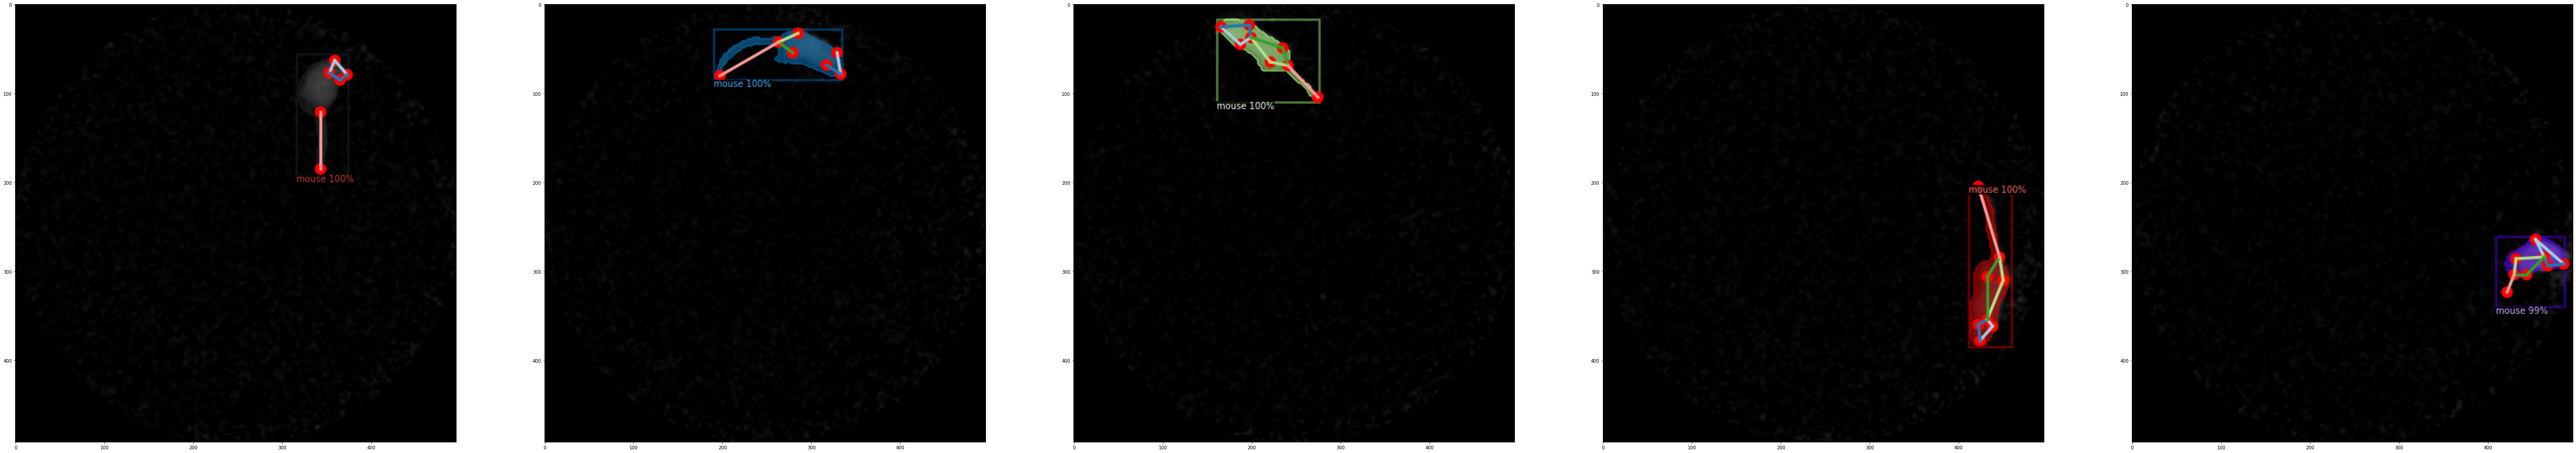

In [16]:
num = 5
fig, axs = plt.subplots(1, num, figsize=(20*num,20))
for d, ax in zip(random.sample(annotations, num), axs):
    im = cv2.imread(d["file_name"])[:,:,0,None]
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    #print(outputs)
    
    v = Visualizer(convert_image_to_rgb(im, "L"),
                   metadata=MetadataCatalog.get("moseq_train"), 
                   scale=2.0, 
                   instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    ax.imshow(out.get_image())

In [14]:
outputs

{'instances': Instances(num_instances=1, image_height=246, image_width=248, fields=[pred_boxes: Boxes(tensor([[155.5005,  47.7940, 222.8247, 100.8883]], device='cuda:0')), scores: tensor([1.], device='cuda:0'), pred_classes: tensor([0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]], device='cuda:0'), pred_keypoints: tensor([[[2.2233e+02, 9.7447e+01, 1.2091e+00],
          [2.2035e+02, 8.7615e+01, 1.3360e+00],
          [2.1144e+02, 9.2531e+01, 6.4820e-01],
          [2.1342e+02, 8.7615e+01, 8.0666e-01],
          [2.0946e+02, 6.9917e+01, 9.3908e+00],
          [1.9758e+02, 7.4833e+01, 9.3774e-01],
          [1.9758e+02, 6.4017e+01, 1